# Analysis of DOCKSTRING target screens

In [3]:
%reload_ext autoreload
%autoreload 2

import rdkit
rdkit.Chem.Draw.IPythonConsole.ipython_maxProperties = -1

import os
import numpy as np
import dgym as dg
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
import os

path = '../../dgym-data/'

dockstring_dir = f'{path}/dockstring_targets/'
files = os.listdir(dockstring_dir)
targets = sorted([f for f in files if 'target' in f])
targets_map = {str(idx): t.split('_')[0] for (idx, t) in enumerate(targets)}

In [55]:
path = '../../dgym-data/analysis/screen/dockstring/'
files = os.listdir(path)

results = []
for file in files:
    if file.endswith('tsv'):
        # get tsv
        result = pd.read_csv(path + file, sep='\t')
        
        # metadata
        target_index, scorer = tuple(file.replace('.tsv', '').split('_')[-2:])
        result['target_index'] = target_index
        result['scorer'] = scorer
        
        # add to results
        results.append(result)

df = pd.concat(results)
df['target'] = df['target_index'].apply(targets_map.get)
df = df.reset_index(drop=True)

In [116]:
df.query('scorer == "gnina"').groupby('target')['affinity'].agg(['mean', 'median', 'std', 'count']).sort_values('mean')

,mean,median,std,count
target,,,,
CASP3,5.394094,5.426138,0.567644,898
PTPN1,5.467294,5.444927,0.531766,898
HMGCR,5.515906,5.491248,0.526220,600
BACE1,5.531448,5.561836,0.540671,404
MAOB,5.644971,5.806964,1.347801,600
AR,5.651429,5.738875,0.743617,600
CA2,5.889675,5.881924,0.587245,900
PGR,5.995611,6.069882,0.674737,595
MAPK14,6.004126,6.011642,0.480943,300


Text(0.5, 1.0, 'eCDF of docking scores | scorer = VINARDO')

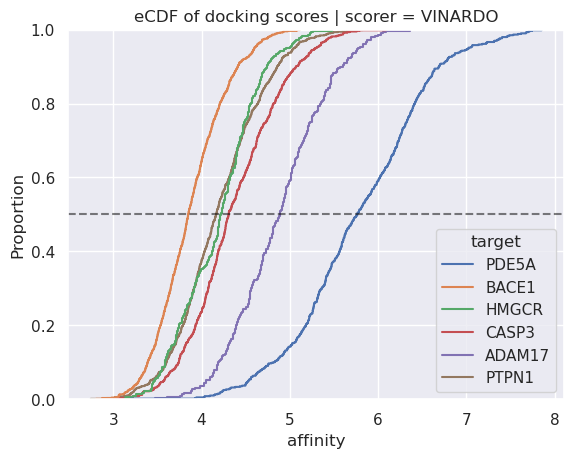

In [113]:
import seaborn as sns

sns.set()
sns.ecdfplot(
    df.query('scorer == "vinardo"').query('target in ["BACE1", "PTPN1", "HMGCR", "CASP3", "ADAM17", "PDE5A"]'),
    x='affinity',
    # y='affinity',
    hue='target',
)

plt.axhline(0.5, linestyle='--', color='black', alpha=0.5)
plt.title('eCDF of docking scores | scorer = VINARDO')